# Importing Libraries and Data

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime as dt

In [2]:
# Importing Data
Path = r'D:\Data_Analysis\05-12-2025_Bike_Dashboard\02.Data'
df_bikes = pd.read_csv(os.path.join(Path, 'Prepared Data', 'Citi_Bike_2022.csv'), index_col=None,
                       parse_dates=['started_at', 'ended_at', 'date'], low_memory=False)
df_bikes.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
merged                        object
dtype: object

In [3]:
df_bikes.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,merged
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3,both
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28,0.1,both
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10,1.6,both
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26,-2.3,both
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13,4.0,both


# Data Consistency Checks

In [4]:
# Removing merge indicator column
df_bikes.drop(columns={'merged'}, inplace=True)
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895485 entries, 0 to 895484
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             895485 non-null  object        
 1   rideable_type       895485 non-null  object        
 2   started_at          895485 non-null  datetime64[ns]
 3   ended_at            895485 non-null  datetime64[ns]
 4   start_station_name  895475 non-null  object        
 5   start_station_id    895475 non-null  object        
 6   end_station_name    892281 non-null  object        
 7   end_station_id      892281 non-null  object        
 8   start_lat           895485 non-null  float64       
 9   start_lng           895485 non-null  float64       
 10  end_lat             893515 non-null  float64       
 11  end_lng             893515 non-null  float64       
 12  member_casual       895485 non-null  object        
 13  date                895485 no

In [5]:
# Checking for duplicates
df_bikes[df_bikes.duplicated()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp


In [6]:
# Checking for mixed-type values
for col in df_bikes.columns.tolist():
    weird = (df_bikes[[col]].map(type) != df_bikes[[col]].iloc[0].apply(type)).any(axis=1)
    if len(df_bikes[weird]) > 0:
        print(col)

start_station_name
start_station_id
end_station_name
end_station_id


No duplicates and mixed-type values. Only alpha numeric value columns that should not affect future analysis.

In [7]:
df_bikes.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,date,avgTemp
count,895485,895485,895485.000000,895485.000000,893515.000000,893515.000000,895485,895485.000000
mean,2022-07-22 01:05:04.156263424,2022-07-22 01:22:36.676869376,40.731927,-74.040461,40.731868,-74.040205,2022-07-21 10:19:30.857803776,17.497078
min,2022-01-01 00:10:20,2022-01-01 00:14:06,40.706495,-74.088964,40.640000,-74.140000,2022-01-01 00:00:00,-11.700000
25%,2022-05-22 00:52:46,2022-05-22 01:42:35,40.721124,-74.046305,40.721124,-74.045953,2022-05-22 00:00:00,11.600000
50%,2022-07-27 12:59:22,2022-07-27 13:11:57,40.733670,-74.037977,40.733670,-74.037977,2022-07-27 00:00:00,19.200000
75%,2022-09-27 13:43:09,2022-09-27 14:02:37,40.740973,-74.030970,40.740973,-74.030970,2022-09-27 00:00:00,24.300000
max,2022-12-31 23:58:26,2023-01-02 08:33:33,40.754992,-74.023490,40.872412,-73.888271,2022-12-31 00:00:00,31.300000
std,NaN,NaN,0.012095,0.012219,0.012222,0.012178,NaN,8.498326


## Reviewing Unique Values

In [8]:
# Checking number of unique values per column
df_bikes[['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id',
         'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'date', 'avgTemp']].nunique()

ride_id               895485
rideable_type              3
started_at            870490
ended_at              869885
start_station_name        84
start_station_id          86
end_station_name         320
end_station_id           319
start_lat              65811
start_lng              68476
end_lat                  415
end_lng                  412
member_casual              2
date                     365
avgTemp                  225
dtype: int64

There seems to be a disproportionate amount of starting lattitude and starting longitude coordinates compared to the number of start station names. Will need to review this further before proceeding with any analysis.

In [9]:
# Creating a dictionary to view unique items of most relevant columns
relevant = df_bikes[['rideable_type', 'start_station_name', 'start_station_id',
                     'end_station_name', 'end_station_id', 'member_casual']]
Uniques = {col: relevant[col].unique() for col in relevant.columns}
print(dict(list(Uniques.items())[:2]))

{'rideable_type': array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object), 'start_station_name': array(['12 St & Sinatra Dr N', 'Essex Light Rail', 'Christ Hospital',
       'Grove St PATH', 'Willow Ave & 12 St', 'Grand St',
       'Madison St & 1 St', 'Union St', 'Montgomery St', 'Hilltop',
       'Pershing Field', 'Manila & 1st',
       'City Hall - Washington St & 1 St', 'Riverview Park',
       'Jersey & 6th St', 'Bergen Ave & Stegman St',
       'Communipaw & Berry Lane', 'Paulus Hook',
       '9 St HBLR - Jackson St & 8 St', 'Washington St',
       'Liberty Light Rail', 'City Hall',
       'Hoboken Terminal - River St & Hudson Pl', '5 Corners Library',
       'Hoboken Terminal - Hudson St & Hudson Pl', 'Fairmount Ave',
       'Jackson Square', 'Dey St', 'Warren St', 'Newport Pkwy',
       'Clinton St & Newark St', 'Baldwin at Montgomery',
       'Bloomfield St & 15 St', 'Clinton St & 7 St', 'Harborside',
       'Brunswick & 6th', 'Hoboken Ave at Monmouth St', 'Oakla

In [10]:
# Sorting above dictionary array values and printing to inspect visually
sortedValues = {k: sorted(v, key=str) for k, v in Uniques.items()}
for k, v in sortedValues.items():
    print(f'\033[1m{k.upper()}\033[0m: {v}\n')

RIDEABLE_TYPE: ['classic_bike', 'docked_bike', 'electric_bike']

START_STATION_NAME: ['11 St & Washington St', '12 St & Sinatra Dr N', '14 St Ferry - 14 St & Shipyard Ln', '4 St & Grand St', '5 Corners Library', '6 St & Grand St', '7 St & Monroe St', '8 St & Washington St', '9 St HBLR - Jackson St & 8 St', 'Adams St & 11 St', 'Adams St & 2 St', 'Astor Place', 'Baldwin at Montgomery', 'Bergen Ave', 'Bergen Ave & Sip Ave', 'Bergen Ave & Stegman St', 'Bloomfield St & 15 St', 'Brunswick & 6th', 'Brunswick St', 'Christ Hospital', 'Church Sq Park - 5 St & Park Ave', 'City Hall', 'City Hall - Washington St & 1 St', 'Clinton St & 7 St', 'Clinton St & Newark St', 'Columbus Dr at Exchange Pl', 'Columbus Drive', 'Columbus Park - Clinton St & 9 St', 'Communipaw & Berry Lane', 'Dey St', 'Dixon Mills', 'Essex Light Rail', 'Fairmount Ave', 'Glenwood Ave', 'Grand St', 'Grand St & 14 St', 'Grant Ave & MLK Dr', 'Grove St PATH', 'Hamilton Park', 'Harborside', 'Heights Elevator', 'Hilltop', 'Hoboken Ave a

From above only MTL-ECO5-LAB of start_station_id and Shop Morgan of end_station_id seem odd.

## Reviewing and resolving trailing spaces

In [11]:
# Viewing details of MTL-ECO5-LAB and Shop Morgan observations.
df_bikes.loc[(df_bikes['start_station_id'] == 'MTL-ECO5-LAB') |
             (df_bikes['end_station_id'] == 'Shop Morgan ')]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
609369,B4AA1050FAE11F5D,classic_bike,2022-09-01 14:02:56,2022-09-02 10:01:42,Grove St PATH,JC005,Shop Morgan,Shop Morgan,40.719586,-74.043117,40.709873,-73.931594,member,2022-09-01,25.9
677922,02BA03C405C9887E,electric_bike,2022-09-01 13:06:04,2022-09-02 10:01:42,Grove St PATH,JC005,Shop Morgan,Shop Morgan,40.719586,-74.043117,40.709873,-73.931594,casual,2022-09-01,25.9
678022,1FEA1A9717DAFB3D,classic_bike,2022-09-01 17:21:11,2022-09-02 10:01:42,Warren St,JC006,Shop Morgan,Shop Morgan,40.721124,-74.038051,40.709873,-73.931594,member,2022-09-01,25.9
678061,DFA23568EAF881A4,classic_bike,2022-09-01 14:24:45,2022-09-02 10:01:42,Newport PATH,JC066,Shop Morgan,Shop Morgan,40.727224,-74.033759,40.709873,-73.931594,member,2022-09-01,25.9
678133,BB0EB85C4A18B367,electric_bike,2022-09-01 13:19:22,2022-09-02 10:01:42,11 St & Washington St,HB502,Shop Morgan,Shop Morgan,40.749985,-74.027150,40.709873,-73.931594,casual,2022-09-01,25.9
701575,C63FE64FA342358B,classic_bike,2022-10-03 17:44:03,2022-10-03 17:48:30,MTL-ECO5-LAB,MTL-ECO5-LAB,MTL-ECO5-LAB,MTL-ECO5-LAB,40.747166,-74.088964,40.747166,-74.088964,casual,2022-10-03,11.5
701576,7CF0A9BEA7601D09,classic_bike,2022-10-03 13:17:36,2022-10-03 13:17:45,MTL-ECO5-LAB,MTL-ECO5-LAB,MTL-ECO5-LAB,MTL-ECO5-LAB,40.747166,-74.088964,40.747166,-74.088964,casual,2022-10-03,11.5


Upon further inspection, it's only necessary to remove trailing spaces of Shop Morgan.

In [12]:
# Verifying if Shop Morgan is the only value with leading or trailing spaces in all columns
for col in df_bikes.select_dtypes(include='object').columns:
    verfy = df_bikes[col].astype(str).apply(lambda x: x != x.strip())
    valuesWithSpaces = df_bikes.loc[verfy, col].unique()
    if len(valuesWithSpaces) > 0:
        print(f'\n{col}:')
        print(valuesWithSpaces[:15])


end_station_id:
['Shop Morgan ']


In [13]:
# Removing trailing space of 'end_station_id' column
df_bikes['end_station_id'] = df_bikes['end_station_id'].str.strip()

# Confirming trailing space is no longer present
df_bikes.loc[df_bikes['end_station_id'].str.startswith('S', na=False), 'end_station_id'].tolist()

['SYS035',
 'SYS035',
 'SYS035',
 'SYS035',
 'SYS035',
 'SYS035',
 'SYS035',
 'SYS035',
 'Shop Morgan',
 'Shop Morgan',
 'Shop Morgan',
 'Shop Morgan',
 'Shop Morgan',
 'SYS035',
 'SYS035']

## Reviewing and resolving missing values

In [14]:
# Counting NaN values in all columns
df_bikes.isna().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name      10
start_station_id        10
end_station_name      3204
end_station_id        3204
start_lat                0
start_lng                0
end_lat               1970
end_lng               1970
member_casual            0
date                     0
avgTemp                  0
dtype: int64

In [15]:
# Reviewing start_station columns with missing values
df_bikes[df_bikes['start_station_id'].isna()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
780847,F0D1334BD5FB8520,classic_bike,2022-11-12 07:31:56,2022-11-12 08:32:03,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,casual,2022-11-12,19.7
780848,E08E1BB778EB4CFD,classic_bike,2022-11-10 15:09:27,2022-11-10 16:09:38,NaN,NaN,NaN,NaN,40.74,-74.03,40.74,-74.03,member,2022-11-10,12.6
780849,217DDED37E5C6C83,classic_bike,2022-11-12 12:55:58,2022-11-12 13:56:07,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,casual,2022-11-12,19.7
780854,BD0EC67EDCFC2E65,classic_bike,2022-11-10 17:21:50,2022-11-10 20:13:05,NaN,NaN,NaN,NaN,40.74,-74.03,40.72,-74.05,casual,2022-11-10,12.6
780855,EEEE26A65B2E8818,classic_bike,2022-11-13 16:46:24,2022-11-13 17:49:18,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,casual,2022-11-13,12.9
780861,E1376856B2B40ED4,classic_bike,2022-11-11 08:46:07,2022-11-11 09:49:37,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,casual,2022-11-11,16.4
782235,B3231280404C96CD,classic_bike,2022-11-12 20:40:07,2022-11-12 21:40:41,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,casual,2022-11-12,19.7
782236,5851BFAC140A82B4,classic_bike,2022-11-13 15:30:15,2022-11-13 16:30:25,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,member,2022-11-13,12.9
782246,95BA78454BF7CF5E,classic_bike,2022-11-12 19:38:06,2022-11-12 20:39:23,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,member,2022-11-12,19.7
782247,151E4996C9C7512D,classic_bike,2022-11-12 17:35:56,2022-11-12 18:48:57,NaN,NaN,NaN,NaN,40.72,-74.05,40.72,-74.05,member,2022-11-12,19.7


In [16]:
# Calculating missing values percent of column with highest NaNs
(df_bikes[['start_station_id', 'end_station_id', 'end_lng']].isna().sum() /
 len(df_bikes[['start_station_id', 'end_station_id', 'end_lng']]))*100

start_station_id    0.001117
end_station_id      0.357795
end_lng             0.219993
dtype: float64

All columns with missing values have less than 0.36% of missing values. Will proceed to resolve all rows with missing values of start_station_id.

In [17]:
# Verifying if missing values can be imputed based on data in other columns
df_bikes.loc[(df_bikes['end_lat'] == 40.72) & (df_bikes['end_lng'] == -74.05)].sort_values(by='start_lat').head(45)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
12164,04757EF23F48C7B0,classic_bike,2022-01-16 11:41:46,2022-01-17 11:00:40,Liberty Light Rail,JC052,NaN,NaN,40.711242,-74.055701,40.72,-74.05,member,2022-01-16,-8.0
479221,D1F07AE5D990ADD1,classic_bike,2022-08-14 16:54:55,2022-08-14 17:55:02,Liberty Light Rail,JC052,NaN,NaN,40.711272,-74.055733,40.72,-74.05,casual,2022-08-14,24.0
792773,37D49AFAF11B8BAC,classic_bike,2022-11-20 10:46:52,2022-11-20 11:52:27,Liberty Light Rail,JC052,NaN,NaN,40.711286,-74.055659,40.72,-74.05,member,2022-11-20,2.7
559584,71A4EEFBBE13727D,classic_bike,2022-08-13 13:55:34,2022-08-13 14:55:41,Morris Canal,JC072,NaN,NaN,40.712259,-74.038211,40.72,-74.05,member,2022-08-13,23.1
11859,4A898152CB214964,classic_bike,2022-01-17 07:24:48,2022-01-17 11:00:40,Essex Light Rail,JC038,NaN,NaN,40.712774,-74.036486,40.72,-74.05,casual,2022-01-17,3.9
559609,623CB2278610878A,classic_bike,2022-08-05 12:36:43,2022-08-05 13:36:54,Marin Light Rail,JC013,NaN,NaN,40.714561,-74.042834,40.72,-74.05,casual,2022-08-05,29.3
16518,48980D9DC2B9B6BF,classic_bike,2022-01-08 14:42:05,2022-01-09 15:03:48,Marin Light Rail,JC013,NaN,NaN,40.714584,-74.042817,40.72,-74.05,member,2022-01-08,-2.5
16519,615C12C06FFED24F,classic_bike,2022-01-08 14:42:36,2022-01-09 15:03:48,Marin Light Rail,JC013,NaN,NaN,40.714584,-74.042817,40.72,-74.05,casual,2022-01-08,-2.5
16171,5810DA29F654C46B,electric_bike,2022-01-26 12:40:36,2022-01-26 12:45:14,Marin Light Rail,JC013,NaN,NaN,40.714584,-74.042817,40.72,-74.05,member,2022-01-26,-2.3
460239,7DD0FB1FEC634986,classic_bike,2022-07-03 01:00:14,2022-07-03 01:08:49,Marin Light Rail,JC013,NaN,NaN,40.714666,-74.042895,40.72,-74.05,member,2022-07-03,26.9


In [18]:
(df_bikes[['start_lat', 'start_lng', 'end_lat', 'end_lng']] == 0.0).sum()

start_lat    0
start_lng    0
end_lat      0
end_lng      0
dtype: int64

The above results confirm the start_station_name and start_station_id columns don't have other column values that would help to impute missing values. Will proceed to remove these 10 data points.

In [19]:
df_bikes_clean = df_bikes[df_bikes['start_station_name'].isna() == False]
df_bikes_clean.isna().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name       0
start_station_id         0
end_station_name      3194
end_station_id        3194
start_lat                0
start_lng                0
end_lat               1970
end_lng               1970
member_casual            0
date                     0
avgTemp                  0
dtype: int64

# Visualizations

In [20]:
# Creating a new dataframe for visualizations
df_temp = df_bikes_clean.set_index('date')
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-26,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,-2.3
2022-01-28,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,0.1
2022-01-10,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,1.6
2022-01-26,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,-2.3
2022-01-13,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,4.0


## La Guardia Temperatures Line Plot

Text(0, 0.5, 'Temperature (in Celsius)')

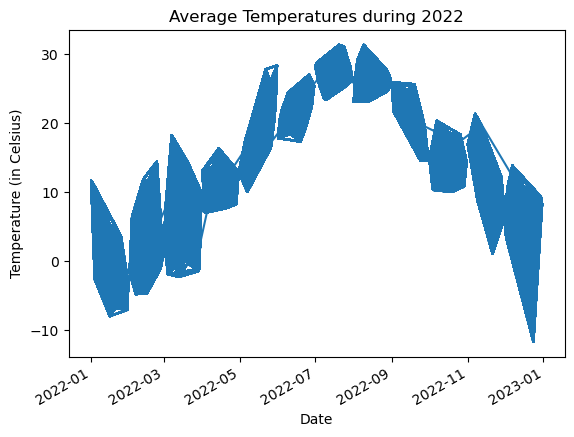

In [21]:
# Using Pandas wrapper to plot temperatures
df_temp['avgTemp'].plot()
plt.title('Average Temperatures during 2022')
plt.xlabel('Date')
plt.ylabel('Temperature (in Celsius)')

## Daily Rides with Temperatures Dual Axis Line Chart

In [22]:
# Creating a count of trips per day with average temperatures dataframe.
df_trips = pd.DataFrame(df_bikes_clean.groupby(['date'])['ride_id'].count()).reset_index()
df_trips.rename(columns={'ride_id': 'daily_rides'}, inplace=True)
df_trips.head(10)

,date,daily_rides
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832
3,2022-01-04,934
4,2022-01-05,914
5,2022-01-06,1297
6,2022-01-07,459
7,2022-01-08,713
8,2022-01-09,636
9,2022-01-10,859


In [23]:
# Merging df_trips with df_bikes_clean
df_bike_trips = df_bikes_clean.merge(df_trips, on='date', how='outer', indicator='merged')
print(df_bike_trips['merged'].value_counts(dropna=False))
print('Shape of January 1st is', df_bike_trips[df_bike_trips['date'] == '2022-01-01'].shape)
print('Shape of January 2nd is', df_bike_trips[df_bike_trips['date'] == '2022-01-02'].shape)

merged
both          895475
left_only          0
right_only         0
Name: count, dtype: int64
Shape of January 1st is (592, 17)
Shape of January 2nd is (1248, 17)


The above confirms that the merge was successful.

In [24]:
# Removing merged column
df_bike_trips.drop(columns={'merged'}, inplace=True)

# Creating trip duration variable
df_bike_trips['trip_duration'] = (df_bike_trips['ended_at'] - df_bike_trips['started_at']).dt.total_seconds()
df_bike_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,daily_rides,trip_duration
0,115C78C3039FFA89,electric_bike,2022-01-01 09:21:14,2022-01-01 09:35:46,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-01,11.6,592,872.0
1,7FFD810CAA7A919E,classic_bike,2022-01-01 02:43:56,2022-01-01 02:43:57,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-01,11.6,592,1.0
2,E715E8432031B72C,classic_bike,2022-01-01 02:13:33,2022-01-01 02:18:42,Essex Light Rail,JC038,Washington St,JC098,40.712774,-74.036486,40.724294,-74.035483,member,2022-01-01,11.6,592,309.0
3,BF1B7B1E1961A87B,electric_bike,2022-01-01 17:18:46,2022-01-01 18:55:25,Grand St,JC102,W 27 St & 7 Ave,6247.06,40.715178,-74.037683,40.746647,-73.993915,casual,2022-01-01,11.6,592,5799.0
4,4A01F0E53C6F4386,electric_bike,2022-01-01 11:23:32,2022-01-01 11:29:27,Christ Hospital,JC034,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.734786,-74.050444,40.735938,-74.030305,member,2022-01-01,11.6,592,355.0


In [25]:
# Setting date as index for weather data frame
df_temp = df_bike_trips.set_index('date')
print(df_temp.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 895475 entries, 2022-01-01 to 2022-12-31
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             895475 non-null  object        
 1   rideable_type       895475 non-null  object        
 2   started_at          895475 non-null  datetime64[ns]
 3   ended_at            895475 non-null  datetime64[ns]
 4   start_station_name  895475 non-null  object        
 5   start_station_id    895475 non-null  object        
 6   end_station_name    892281 non-null  object        
 7   end_station_id      892281 non-null  object        
 8   start_lat           895475 non-null  float64       
 9   start_lng           895475 non-null  float64       
 10  end_lat             893505 non-null  float64       
 11  end_lng             893505 non-null  float64       
 12  member_casual       895475 non-null  object        
 13  avgTemp      

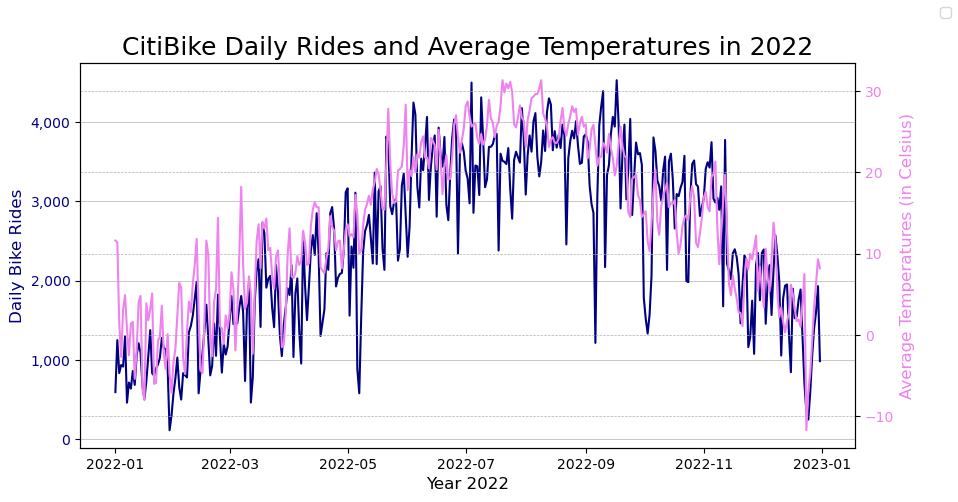

Correlation between Daily Rides and Average Temperatures: 0.814


In [26]:
# Plotting Line Chart Using Object Oriented Approach
plt.style.use('seaborn-v0_8-dark-palette')
fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(100)
fig.legend(['Daily Bike Rides', 'Average Temperatures (in Celsius)'])

# Plotting daily bike rides
ax.plot(df_temp['daily_rides'], color='navy')
ax.set_xlabel('Year 2022', fontsize=12)
ax.tick_params(axis='y', labelcolor='navy')
ax.set_ylabel('Daily Bike Rides', color='navy', fontsize=12)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(axis='y', linestyle='-', linewidth=0.5)

# Creating dual axis and temperatures line plot
ax2 = ax.twinx()
ax2.plot(df_temp['avgTemp'], color='violet')
ax2.set_ylabel('Average Temperatures (in Celsius)', color='violet', fontsize=12)
ax2.tick_params(axis='y', labelcolor='violet')
plt.title('CitiBike Daily Rides and Average Temperatures in 2022', fontsize=18)

plt.grid(linestyle='--', linewidth=0.5)
plt.show()

# Calculating Pearson's correlation coefficient
correlation = df_temp['daily_rides'].corr(df_temp['avgTemp'])
print(f'\033[1mCorrelation between Daily Rides and Average Temperatures: {correlation:.3f}\033[0m')

Used the object oriented paradigm as it offers a higher range of options to customize chart. There is a positive correlation of 0.814 between the daily rides and the average temperature, which confirms that trips increase at similar levels as temperatures, but decline slightly when temperatures exceed the 30 degrees celsius.

# Trip Duration Histogram

In [27]:
# Creating trip duration variable
df_temp['trip_duration'] = (df_temp['ended_at'] - df_temp['started_at']).dt.total_seconds()
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,daily_rides,trip_duration
date,,,,,,,,,,,,,,,,
2022-01-01,115C78C3039FFA89,electric_bike,2022-01-01 09:21:14,2022-01-01 09:35:46,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,11.6,592,872.0
2022-01-01,7FFD810CAA7A919E,classic_bike,2022-01-01 02:43:56,2022-01-01 02:43:57,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,11.6,592,1.0
2022-01-01,E715E8432031B72C,classic_bike,2022-01-01 02:13:33,2022-01-01 02:18:42,Essex Light Rail,JC038,Washington St,JC098,40.712774,-74.036486,40.724294,-74.035483,member,11.6,592,309.0
2022-01-01,BF1B7B1E1961A87B,electric_bike,2022-01-01 17:18:46,2022-01-01 18:55:25,Grand St,JC102,W 27 St & 7 Ave,6247.06,40.715178,-74.037683,40.746647,-73.993915,casual,11.6,592,5799.0
2022-01-01,4A01F0E53C6F4386,electric_bike,2022-01-01 11:23:32,2022-01-01 11:29:27,Christ Hospital,JC034,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.734786,-74.050444,40.735938,-74.030305,member,11.6,592,355.0


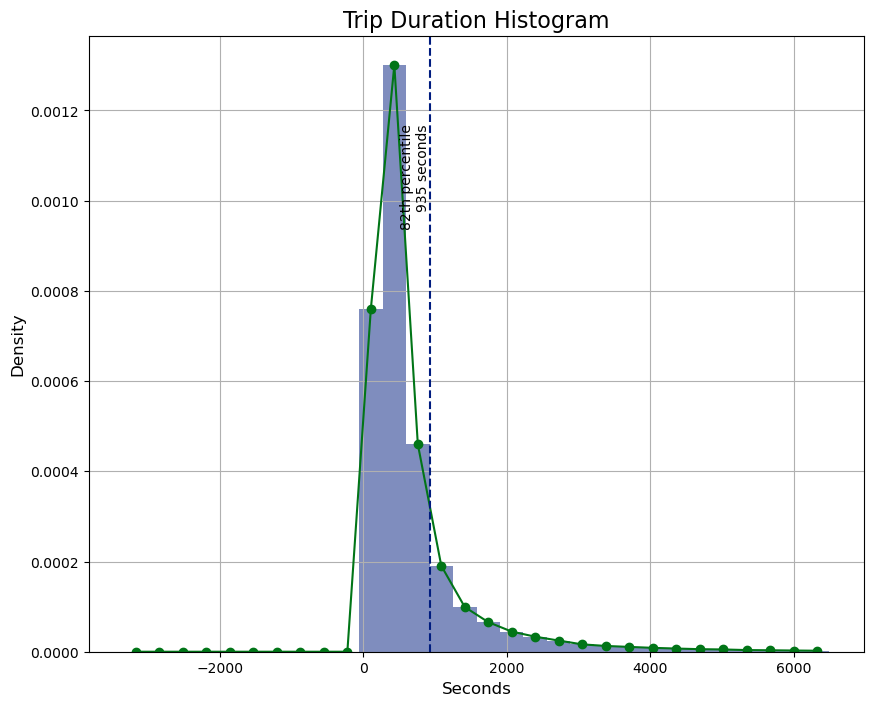

In [28]:
plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(10, 8))
span = df_temp['trip_duration'].dropna()

# Removing extreme outliers
p = 0.82  # percentile
noExtOutliers = span[span <= span.quantile(.99)]
counts, bin_edges = np.histogram(noExtOutliers, bins=30, density=True)
centers = (bin_edges[:-1]+bin_edges[1:])/2

# Plotting trip duration histogram
plt.hist(noExtOutliers, bins=30, density=True, linewidth=0.3, alpha=0.5)
plt.plot(centers, counts, marker='o')

# Annotating percentile cut line based on value span.quantile(p)
plt.axvline(span.quantile(p), linestyle='--')
plt.text(span.quantile(p),
         max(counts)*0.9,
         f'{int(p*100)}th percentile\n{int(span.quantile(p))} seconds',
         rotation=90,
         va='top',
         ha='right')

plt.grid()
plt.xlabel('Seconds', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Trip Duration Histogram', fontsize=16)
plt.show()

The above histogram removes outliers to focus on the dominant trend and uses an empirical curve to connect bar height bin densities. The sharp decline of the 5 minute bins show that most trips have a short duration of up to 10 minutes. There is only a small fraction of users that take trips that exceed 30 minutes. There is approximately 82% probability that a trip takes about 15 minutes ( and 35 seconds) based on the area covered by the 3 tallest bars (density * seconds). This indicates that demand is affected by immediate availability and bike station restocking. This also suggest that  demand is very elastic to price changes.

## Bike and Member Type

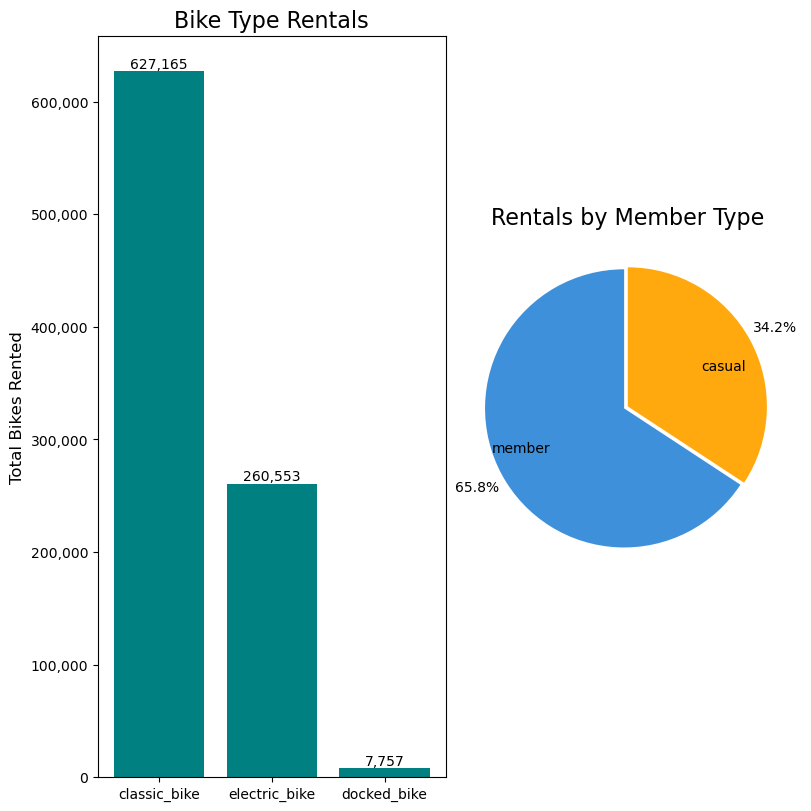

In [29]:
plt.style.use('petroff10')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8), layout='constrained')

# Creating column chart of bike types
bars = ax1.bar(df_temp['rideable_type'].value_counts().index,
               df_temp['rideable_type'].value_counts().values, color='teal')
ax1.set_title('Bike Type Rentals', fontsize=16)
ax1.set_ylabel('Total Bikes Rented', fontsize=12)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Adding data labels on top of the columns
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.,
             height + 0.1,
             f'{height:,.0f}',
             ha='center',
             va='bottom')

# Creating pie chart of member type
ax2.pie(df_temp['member_casual'].value_counts(dropna=False).values, labels=df_temp['member_casual'].value_counts(
    dropna=False).index, autopct='%1.1f%%', pctdistance=1.2, labeldistance=.6, startangle=90, explode=(0.03, 0))
ax2.set_title('Rentals by Member Type', fontsize=16)

plt.show()

Classic bikes are the most popular with over 627,165 rentals per year, which is more than 2 times the electric bike rentals. Docked bikes suggest there are enough bikes available. Members account for 65.8% of these rentals while casual users also have a significant 34.2% contribution.

# Exporting Dataframe as Pickle File

In [30]:
df_bike_trips.to_pickle(os.path.join(Path, 'Prepared Data', 'Bike_Trips_Clean.pkl'))